<a href="https://colab.research.google.com/github/cyxCHENYUXUAN/clyginxiut/blob/cyx/homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

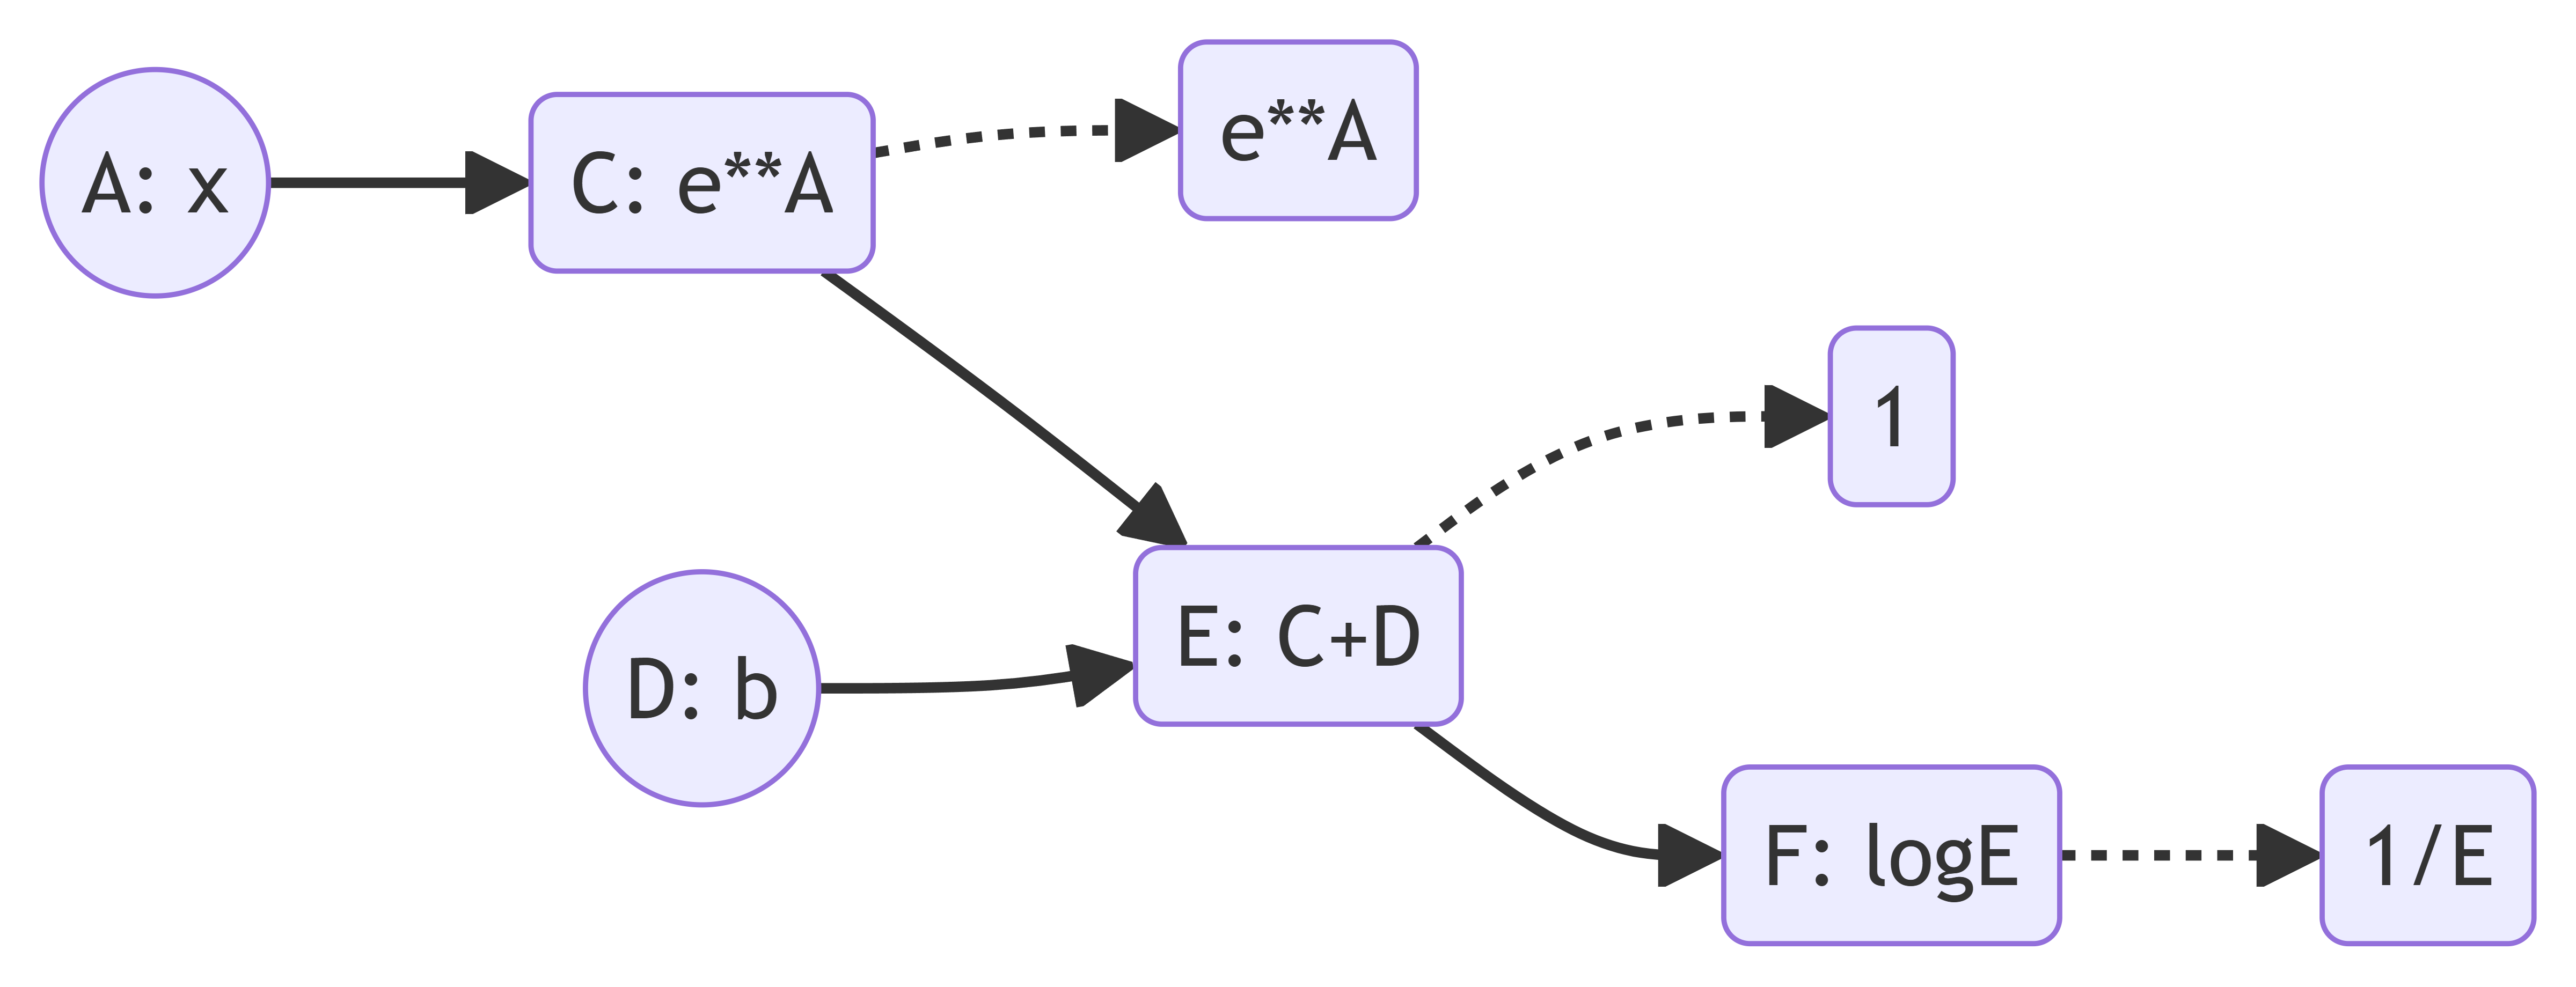

链式求导$$\frac{\partial y}{\partial x}=\frac{\partial y}{\partial\left(e^{x}+5\right)} \cdot \frac{\partial\left(e^{x}+5\right)}{\partial e^{x}} \cdot \frac{\partial e^{x}}{\partial x}$$

对每一步的求导
$$\frac{\partial y}{\partial (e^{x}+5)} =\frac{1}{e^{x}+5} $$


$$\frac{\partial(e^{x}+5)}{\partial e^{x}} =1$$


$$\frac{\partial e^{x}}{\partial x} =e^{x}$$

最后结果
$$\frac{\partial y}{\partial x} = \frac{1}{e^{x}+5} *1*e^{x}=\frac{e^{x}}{e^{x}+5} $$

当x=5时
$$\frac{\partial y}{\partial x} = \frac{1}{e^{5}+5} *1*e^{5}=\frac{e^{5}}{e^{5}+5}\approx 0.9674$$

In [3]:
import torch

x = torch.tensor(5.0, requires_grad=True)

y = torch.log(torch.exp(x) + 5)

y.backward()

x.grad

tensor(0.9674)

pytorch的自动求导方法与链式求导得到的结果差距较小，结果准确

下面从底层实现自动求导

In [9]:
import numpy as np

In [10]:
class AutoDiff:
    def __init__(self, value, grad=1.0):
        self.value = value
        self.grad = grad

    def __add__(self, other):
        if isinstance(other, AutoDiff):
            return AutoDiff(self.value + other.value, self.grad + other.grad)
        else:
            return AutoDiff(self.value + other, self.grad)

    def __mul__(self, other):
        if isinstance(other, AutoDiff):
            new_value = self.value * other.value
            new_grad = self.value * other.grad + self.grad * other.value
            return AutoDiff(new_value, new_grad)
        else:
            return AutoDiff(self.value * other, self.grad * other)

    def sin(self):
        new_value = np.sin(self.value)
        new_grad = self.grad * np.cos(self.value)
        return AutoDiff(new_value, new_grad)

    def cos(self):
        new_value = np.cos(self.value)
        new_grad = -self.grad * np.sin(self.value)
        return AutoDiff(new_value, new_grad)

    def exp(self):
        new_value = np.exp(self.value)
        new_grad = self.grad * np.exp(self.value)
        return AutoDiff(new_value, new_grad)

    def log(self):
        if self.value <= 0:
            raise ValueError("Error")
        new_value = np.log(self.value)
        new_grad = self.grad / self.value
        return AutoDiff(new_value, new_grad)

    def __repr__(self):
        return f"AutoDiff(value={self.value}, grad={self.grad})"

In [11]:
x = AutoDiff(5)
y = (x.exp() + 5).log()

In [12]:
y.value, y.grad

(5.033134668191276, 0.9674082716942368)